<a href="https://colab.research.google.com/github/ansimhyang60/Project/blob/main/%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1_%EC%95%88%EC%8B%AC%ED%96%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[데이터 설명]
 id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질

YearBuilt : 완공 연도

YearRemodAdd : 리모델링 연도

ExterQual : 외관 재료 품질

BsmtQual : 지하실 높이

TotalBsmtSF : 지하실 면적

1stFlrSF : 1층 면적

GrLivArea : 지상층 생활 면적

FullBath : 지상층 화장실 개수

KitchenQual : 부억 품질

GarageYrBlt : 차고 완공 연도

GarageCars: 차고 자리 개수

GarageArea: 차고 면적

target : 집값(달러 단위)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,id,Overall Qual,Gr Liv Area,Exter Qual,Garage Cars,Garage Area,Kitchen Qual,Total Bsmt SF,1st Flr SF,Bsmt Qual,Full Bath,Year Built,Year Remod/Add,Garage Yr Blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [ ]:
df = data.copy()

In [ ]:
df.dtypes

id                 int64
Overall Qual       int64
Gr Liv Area        int64
Exter Qual        object
Garage Cars        int64
Garage Area        int64
Kitchen Qual      object
Total Bsmt SF      int64
1st Flr SF         int64
Bsmt Qual         object
Full Bath          int64
Year Built         int64
Year Remod/Add     int64
Garage Yr Blt      int64
target             int64
dtype: object

# 컬럼 조회

In [ ]:
# 실수형 컬럼의 조회 (진정한 연속형 데이터 일 경우가 많음)
float_data = df.columns[(df.dtypes == float)]
print(float_data)

Index([], dtype='object')


In [ ]:
# 정수형 컬럼의 조회
# : 연속형 컬럼일 수도 있고
# 타이타닉의 사망0 생존 1 경우 처럼 범주형인데 수치로 나타낸 경우도 있음

# 이상치 제거는 연속형 데이터에 이상치를 제거하고
# 연속형 데이터 중 성인 남성의 키 에서 하승진 선수의 경우 매우 드문 경우 이므로 제거

# 타이타닉의 생존 사망과 같은 범주형 데이터는
#  0, 1, 2 ,100 과 같은 경우 100 이 이상치 이지만
# 100 이라는것이 연속형 데이터 처럼 크다 작다의 의미가 아니라 그룹의 이름이기 때문에
# 때문에 보통 이상치 제거를 하지 않음

# 이상치 제거시 어느정도 데이터 손실이 일어나기 때문에 이데이터가
# 연속형인지 아니면 범주형인지에 대해서 고민후 작업이 이루어 져야함

"""

id : 데이터 고유 id

OverallQual : 전반적 재료와 마감 품질
GrLivArea : 지상층 생활 면적
GarageCars: 차고 자리 개수
GarageArea: 차고 면적
TotalBsmtSF : 지하실 면적
1stFlrSF : 1층 면적
FullBath : 지상층 화장실 개수
YearBuilt : 완공 연도
YearRemodAdd : 리모델링 연도
GarageYrBlt : 차고 완공 연도
ExterQual : 외관 재료 품질
BsmtQual : 지하실 높이
KitchenQual : 부억 품질
target : 집값(달러 단위)
"""

int_data = df.columns[(df.dtypes == int)]
print(int_data)

Index(['id', 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area',
       'Total Bsmt SF', '1st Flr SF', 'Full Bath', 'Year Built',
       'Year Remod/Add', 'Garage Yr Blt', 'target'],
      dtype='object')


In [ ]:
# 차고 자리 개수
# 연속형의 숫자로 볼 수 도 있지만 범주형으로 볼수도 있는 애매함

# 집에 외제차랑 SUV 가 많아서 차고 자리가 작음 -> 집이 비싸지 않을까?
# 집이 작아서 차고 자리 1개 -> 집이 싸지 않을까?

# 아파트 혹은 연립(외국에는 저소득층 주거지) 이라서 차고 자리가 많을수도
# 단순히 이상치 제거하지 말고 고민 필요

# 연속형인가? 범주형인가?

# 빈도수를 조회하면 대부분 1대~3대 사이
df["Garage Cars"].value_counts()

2    794
1    372
3    172
4     11
5      1
Name: Garage Cars, dtype: int64

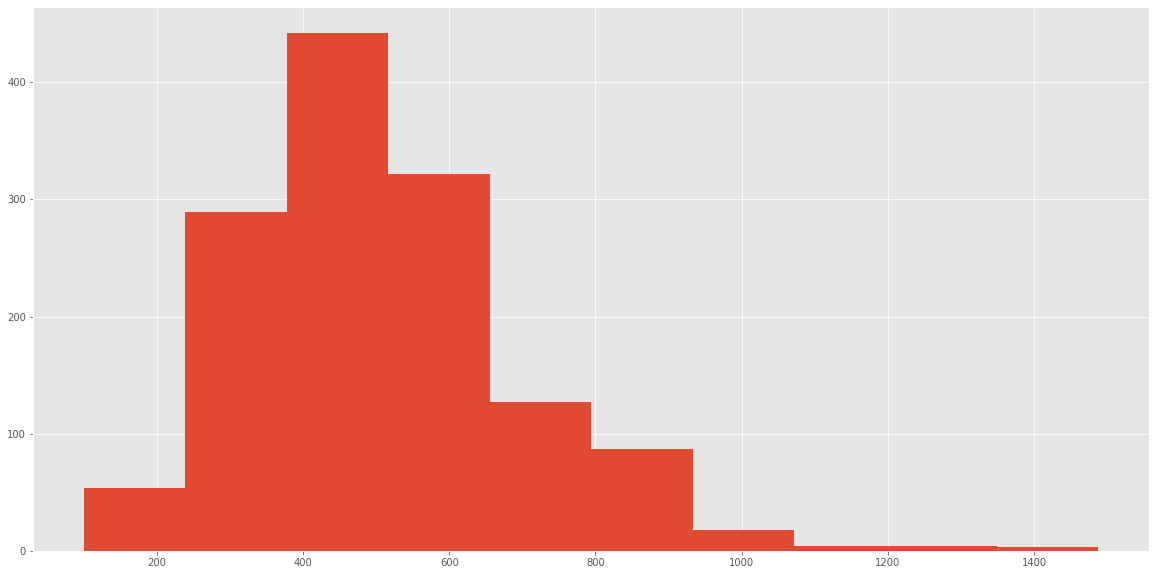

In [ ]:
# 차고 면적
plt.figure(figsize=(20,10))
df["Garage Area"].hist(bins=10)

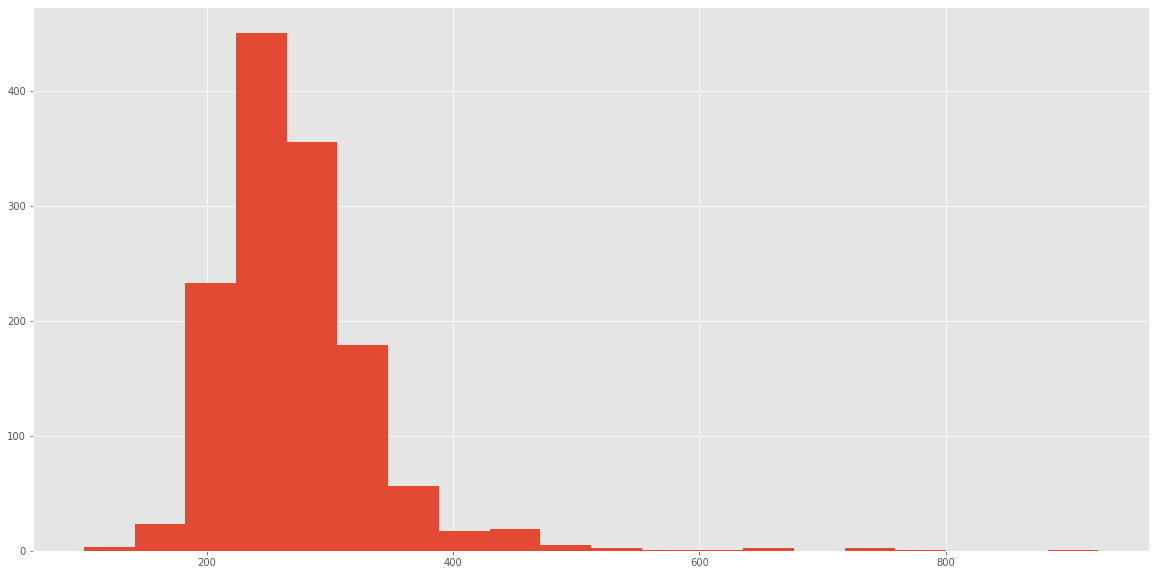

In [ ]:
plt.figure(figsize=(20,10))
# 차 1대당 차고 면적
# 대부분 200~400 사이
(df["Garage Area"]//df["Garage Cars"]).hist(bins=20)

In [ ]:
# 완공년도
# 1900 년대 : 958
# 2000 년대 : 381
# 1800 년대 : 11 -> 문제의 이상치들 (1800 년대에 지어진 집)

(df['Year Built']//100).value_counts()

19    958
20    381
18     11
Name: Year Built, dtype: int64

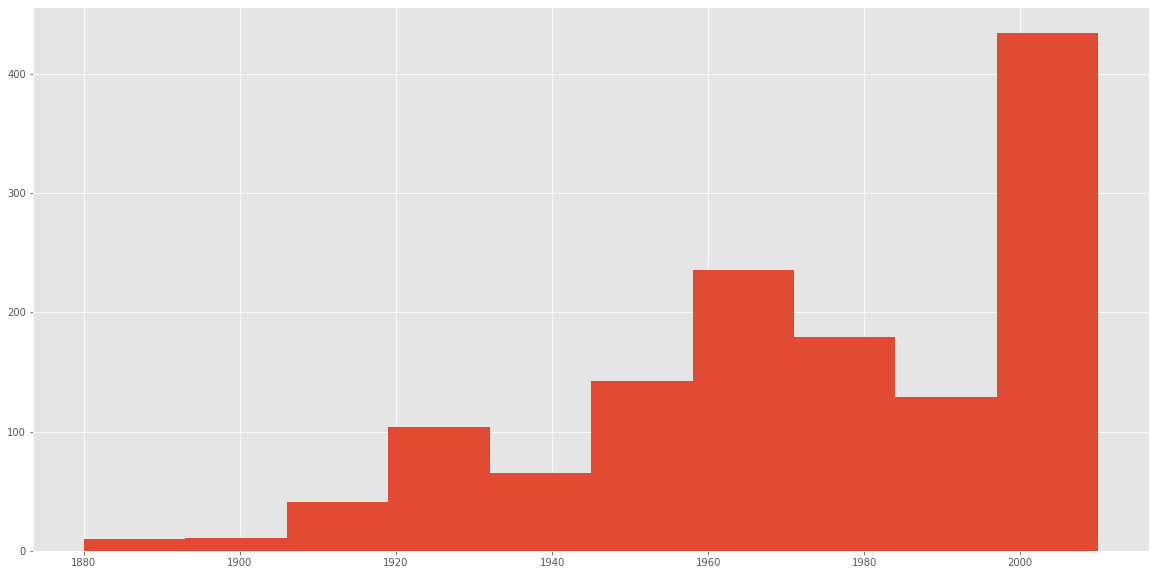

In [ ]:
plt.figure(figsize=(20,10))
df['Year Built'].hist()

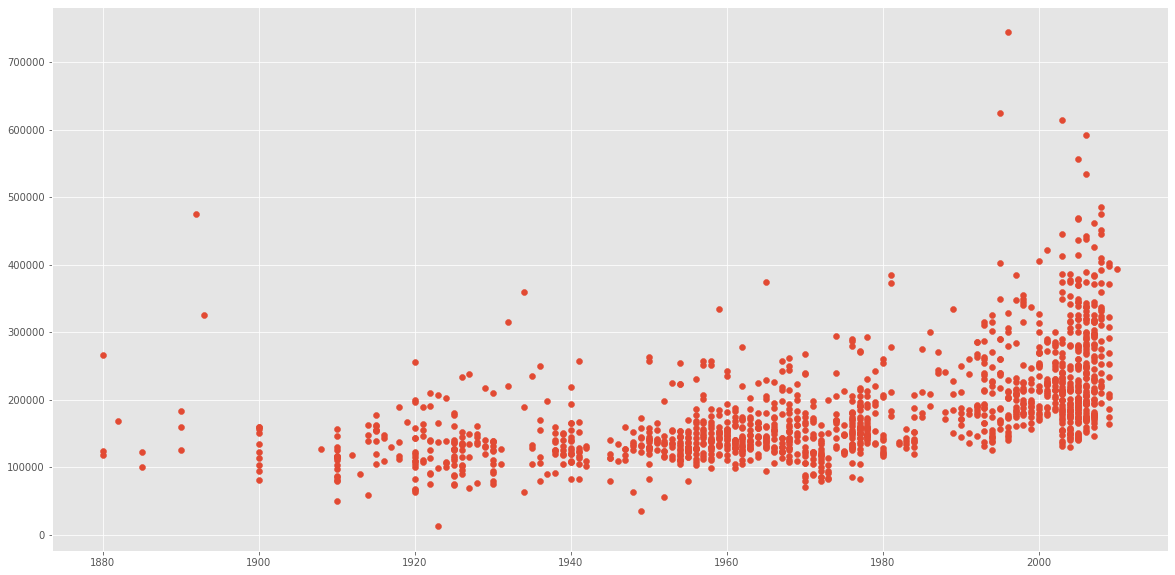

In [ ]:
# 년도와 집값의 산점도
# 보통 1900년도 이전에 지어진 집이 집값이 쌈
# 그러나 1900년도 이전에 지어진 집 중에서 1집의 집값만 비쌈 (유적지? 박물관?) => 이집만 이상치로 보는건 어떤지
plt.figure(figsize=(20,10))
plt.scatter(x=df["Year Built"], y=df["target"])

[box plot Result]

Remove-outlier : Garage Cars, Full Bath, Year Built, Garage Yr Blt

Change-standard -> Check-outlier : Gr Liv Area, Garage Area, Total Bsmt SF, 1st Fir SF, (target)

[Function : Removing outlier]

In [ ]:
n4df = df[['Garage Cars', 'Full Bath', 'Year Built', 'Garage Yr Blt']]

In [ ]:
ndata = n4df.columns

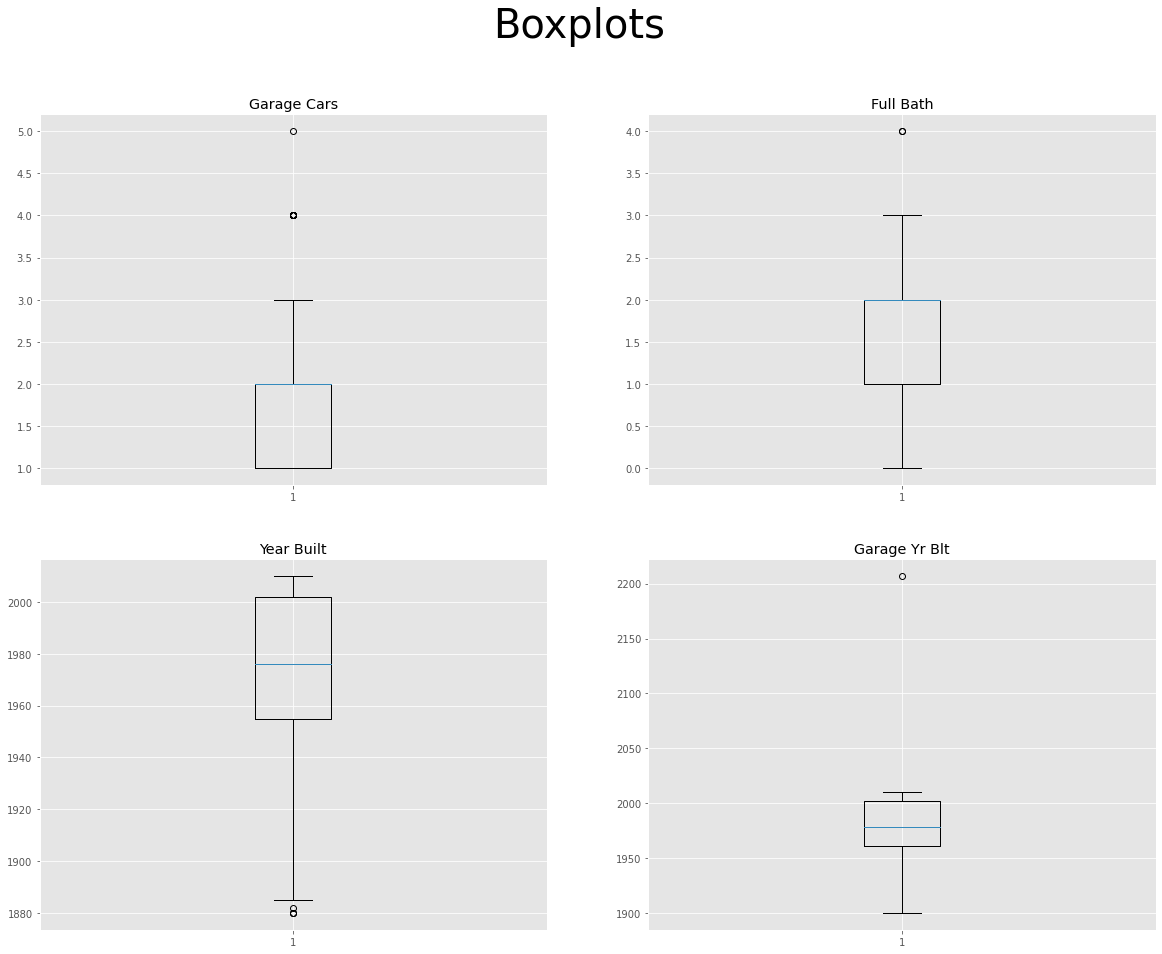

In [ ]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(ndata)):
    plt.subplot(2,2,i+1) # 행/열/개수
    plt.title(ndata[i])
    plt.boxplot(df[ndata[i]])
plt.show()

In [ ]:
def outlier(data):
  q1, q3 = np.percentile(data, [25,75])
  print("q1 =", q1)
  print("q3 =", q3)
  iqr = q3 - q1 # 중심 범위
  lb = q1 - (iqr * 1.5) # 양쪽 0.25 만큼 확장
  ub = q3 + (iqr * 1.5)
  print("lb = ", lb)
  print("ub =" , ub)

  return data.index[(data > ub) | (data < lb)]

In [ ]:
YB_idx = outlier(n4df['Year Built'])


q1 = 1955.0
q3 = 2002.0
lb =  1884.5
ub = 2072.5


In [ ]:
YB_idx

Int64Index([286, 812, 888, 940], dtype='int64')

In [ ]:
n4df.loc[YB_idx,'Year Built']

286    1882
812    1880
888    1880
940    1880
Name: Year Built, dtype: int64

In [ ]:
n4df = n4df.loc[set(n4df.index) - set(YB_idx)]

In [ ]:
# for i in n4_whole_outlier:
#   n4df = n4df.drop(n4df.index[i])
n4df[n4df['Year Built']<1900]

,Garage Cars,Full Bath,Year Built,Garage Yr Blt
125,2,2,1890,1950
201,2,3,1893,1988
280,2,2,1885,1971
317,2,1,1890,1996
467,2,1,1890,1963
683,3,2,1892,1993
1187,1,1,1885,1954


In [ ]:
YB_idx = outlier(n4df['Year Built'])

q1 = 1956.0
q3 = 2002.0
lb =  1887.0
ub = 2071.0


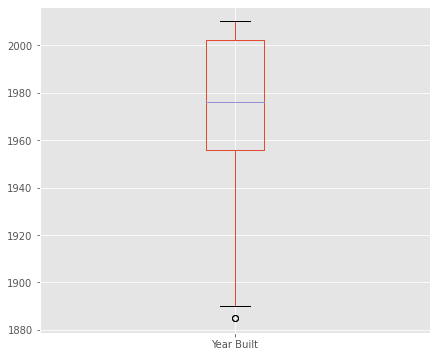

In [ ]:
plt.figure(figsize=(7,6))
boxplot = n4df.boxplot(column=['Year Built'])
#plt.yticks(np.arange(1800,2020,step=20))
plt.show()